# [RQ6] Free your mind!
For this task, we need to find another interesting result about the dataset we've been working on. 

#### Lefty percentage
We thought about finding some unexpected differences between the percentage of left-footed vs right-footed players, and in particular which role showed the most interesting results.

It's a known fact that 10% of the population is left-handed, while the rest is in majority right-handed and, for a tiny part, ambidextrous. We wonder if being left-footed can be an advantage into the field and where, during a competitive match.



---

Let's start importing the necessary libraries and creating the 'players' dataframe

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import math
import numpy as np
%matplotlib inline

with open(r'C:\Users\Notebook HP\Desktop\Homeworks\HW2\players.json', 'r') as myfile:
    data = myfile.read()
play = json.loads(data)
players = pd.DataFrame(play)
players.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


We divide this dataframes into 'left' and 'right' dataframes, which got the 'foot' values left and right.

In [13]:
left = pd.DataFrame(players.loc[players['foot'] == 'left'])
left[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
7,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-04-24,5629,1624,Jan,left,189,Vertonghen,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vertonghen,88,48
12,"{'name': 'Mali', 'id': '466', 'alpha3code': 'M...",1992-01-01,null,3795,Charles,left,180,Traor\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",C. Traor\u00e9,74,393284


In [12]:
right = pd.DataFrame(players.loc[players['foot'] == 'right'])
right[:3]

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


Now we try to have a general idea about the pergentage of left-footed in respect to the players population.

In [9]:
a = len(left.index)
b = len(right.index)

In [10]:
percentage_lefty = str(round(a/(a+b) * 100, 0)) + '%'
percentage_lefty

'24.0%'

We can already notice that this percentage is much more higher than the common value, so there must be some hidden advantage here.


So, we plot the different quantities for every player role.

####  We create the four dataframes for all the possibile roles

In [31]:
def histo(f,g):#plot the histogram for every couple of dataframes
    x = np.arange(2)
    plt.bar(x, height= [f,g] , color = ['red', 'green'])
    plt.xticks(x, ['Left','Right']);
def p(n):#compute the percentage
    return n[0]/(n[0]+n[1]) * 100

In [32]:
defleft = pd.DataFrame(left.loc[left['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])#choosing the right 'role' from the left dataframe
defl = len(defleft.index)#counting the rows
defright = pd.DataFrame(right.loc[right['role'] == {"code2": "DF", "code3": "DEF", "name": "Defender"}])
defr = len(defright.index)
n = [defl, defr]
p(n)

32.151898734177216

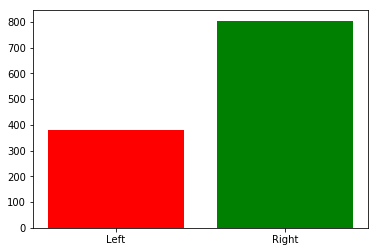

In [22]:
histo(defl, defr)

In [35]:
gkleft = pd.DataFrame(left.loc[left['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkl = len(gkleft.index)
gkright = pd.DataFrame(right.loc[right['role'] == {"code2": "GK", "code3": "GKP", "name": "Goalkeeper"}])
gkr = len(gkright.index)
p([gkl,gkr])


13.526570048309178

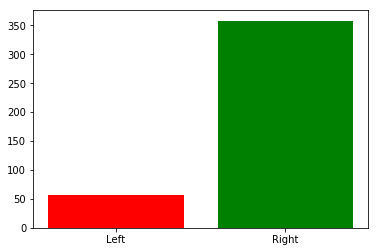

In [36]:
histo(gkl, gkr)

In [37]:
mdleft = pd.DataFrame(left.loc[left['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdright = pd.DataFrame(right.loc[right['role'] == {"code2": "MD", "code3": "MID", "name": "Midfielder"}])
mdl = len(mdleft.index)
mdr = len(mdright.index)
p([mdl,mdr])


22.1953188054883

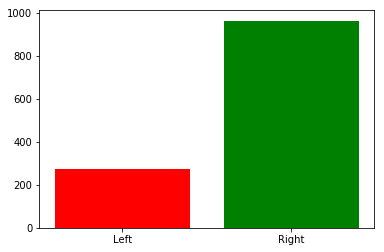

In [38]:
histo(mdl, mdr)

In [41]:
fwleft = pd.DataFrame(left.loc[left['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwright = pd.DataFrame(right.loc[right['role'] == {"code2": "FW", "code3": "FWD", "name": "Forward"}])
fwl = len(fwleft.index)
fwr = len(fwright.index)
p([fwl,fwr])


17.796610169491526

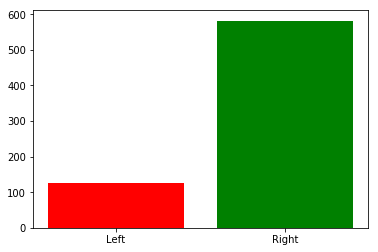

In [42]:
histo(fwl, fwr)

So, we notice that even if the percentages are all over 10%, the only roles where we can see some intersting insights are DF with 32% and MD with 22%.

The main reason might be that defenders and midfielders need to react to the actions of attackers, that are generally right-footed, and so tend to play the ball on the right side during a duel, which is the left side for an observer who is in front of the player, so on his own left.
Therefore, a player that can instictively go left is at advantage against the average stricker.

In fact, the ultimate defender, the GK, doesn't need to be left-footed to win duels, so the percentage returns to more low and common levels. 